# Analyse des Avis et Alertes ANSSI avec Enrichissement des CVE

## Étape 1 : Extraction des Flux RSS

In [37]:
# faire "pip install feedparser" si besoin dans le terminal 
import feedparser

def recuperer_bulletins_rss(url):
    rss_feed = feedparser.parse(url)
    bulletins = []
    for entry in rss_feed.entries:
        bulletin = {
            "Titre du bulletin (ANSSI)": entry.title,
            "Description": entry.description,
            "Lien du bulletin (ANSSI)": entry.link,
            "Date de publication": entry.published
        }
        bulletins.append(bulletin)
    return bulletins

# URLs des flux RSS
avis_url = "https://www.cert.ssi.gouv.fr/avis/feed/"
alerte_url = "https://www.cert.ssi.gouv.fr/alerte/feed/"

avis_bulletins = recuperer_bulletins_rss(avis_url)
alerte_bulletins = recuperer_bulletins_rss(alerte_url)

bulletins = avis_bulletins + alerte_bulletins

# Afficher les bulletins pour vérification
for bulletin in bulletins:
    print(bulletin)

{'Titre du bulletin (ANSSI)': 'Multiples vulnérabilités dans Mattermost Server (13 mai 2025)', 'Description': 'De multiples vulnérabilités ont été découvertes dans Mattermost Server. Elles permettent à un attaquant de provoquer une atteinte à la confidentialité des données et un contournement de la politique de sécurité.', 'Lien du bulletin (ANSSI)': 'https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-AVI-0392/', 'Date de publication': 'Tue, 13 May 2025 00:00:00 +0000'}
{'Titre du bulletin (ANSSI)': 'Multiples vulnérabilités dans les produits SAP (13 mai 2025)', 'Description': "De multiples vulnérabilités ont été découvertes dans les produits SAP. Certaines d'entre elles permettent à un attaquant de provoquer une exécution de code arbitraire à distance, une atteinte à la confidentialité des données et une injection de code indirecte à distance (XSS).", 'Lien du bulletin (ANSSI)': 'https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-AVI-0396/', 'Date de publication': 'Tue, 13 May 2025 00:00:00 +00

## Étape 2 : Extraction des CVE

In [38]:
import requests
import re

def extraire_cves_depuis_bulletin(lien_bulletin):
    # Construit l'URL JSON à partir du lien du bulletin
    if not lien_bulletin.endswith('/'):
        lien_bulletin += '/'
    url_json = lien_bulletin + "json/"
    response = requests.get(url_json)
    data = response.json()
    # Extraction des CVE référencés dans la clé "cves"
    ref_cves = [cve.get("name") for cve in data.get("cves", [])]
    #attention il s’agit d’une liste des dictionnaires avec name et url comme clés
    print( "CVE référencés ", ref_cves)
    # Extraction des CVE avec une regex
    cve_pattern = r"CVE-\d{4}-\d{4,7}"
    cve_list = list(set(re.findall(cve_pattern, str(data))))
    print("CVE trouvés :", cve_list)
    return ref_cves, cve_list

tous_les_cves = set()
for bulletin in bulletins:
    ref_cves, cve_list = extraire_cves_depuis_bulletin(bulletin['Lien du bulletin (ANSSI)'])
    tous_les_cves.update(ref_cves)
    tous_les_cves.update(cve_list)
    bulletin["CVEs"] = list(set(ref_cves + cve_list))
    print(f"Bulletin {bulletin['Titre du bulletin (ANSSI)']} : CVEs = {bulletin['CVEs']}")




CVE référencés  ['CVE-2025-4128', 'CVE-2025-4573']
CVE trouvés : ['CVE-2025-4573', 'CVE-2025-4128']
Bulletin Multiples vulnérabilités dans Mattermost Server (13 mai 2025) : CVEs = ['CVE-2025-4573', 'CVE-2025-4128']
CVE référencés  ['CVE-2025-43003', 'CVE-2025-43007', 'CVE-2025-23191', 'CVE-2025-42999', 'CVE-2025-43009', 'CVE-2025-43011', 'CVE-2025-43006', 'CVE-2025-0060', 'CVE-2025-30012', 'CVE-2025-43000', 'CVE-2025-43004', 'CVE-2025-31324', 'CVE-2025-43005', 'CVE-2025-43008', 'CVE-2025-31329', 'CVE-2025-30009', 'CVE-2025-30011', 'CVE-2025-43002', 'CVE-2025-26662', 'CVE-2025-30010', 'CVE-2025-42997', 'CVE-2025-0061', 'CVE-2025-43010', 'CVE-2024-39592', 'CVE-2025-30018']
CVE trouvés : ['CVE-2025-43006', 'CVE-2025-43003', 'CVE-2025-30010', 'CVE-2025-43007', 'CVE-2024-39592', 'CVE-2025-0060', 'CVE-2025-0061', 'CVE-2025-26662', 'CVE-2025-43002', 'CVE-2025-43009', 'CVE-2025-43010', 'CVE-2025-43005', 'CVE-2025-43008', 'CVE-2025-42999', 'CVE-2025-30011', 'CVE-2025-23191', 'CVE-2025-30012', '

In [39]:
print("Tous les CVEs extraits :", tous_les_cves)

Tous les CVEs extraits : {'CVE-2025-41234', 'CVE-2025-21707', 'CVE-2024-38828', 'CVE-2024-58078', 'CVE-2024-21634', 'CVE-2022-49043', 'CVE-2023-1990', 'CVE-2025-26461', 'CVE-2025-21648', 'CVE-2025-21906', 'CVE-2024-57999', 'CVE-2025-21920', 'CVE-2025-23136', 'CVE-2024-58005', 'CVE-2022-49858', 'CVE-2023-53139', 'CVE-2025-22045', 'CVE-2024-57979', 'CVE-2024-58086', 'CVE-2019-17267', 'CVE-2024-57900', 'CVE-2024-57807', 'CVE-2024-50566', 'CVE-2025-4428', 'CVE-2025-36631', 'CVE-2025-33061', 'CVE-2025-5063', 'CVE-2025-21914', 'CVE-2025-22070', 'CVE-2024-56558', 'CVE-2024-53680', 'CVE-2025-21831', 'CVE-2025-30698', 'CVE-2025-21754', 'CVE-2025-21738', 'CVE-2023-53064', 'CVE-2024-41005', 'CVE-2022-46337', 'CVE-2024-50083', 'CVE-2024-50162', 'CVE-2025-5419', 'CVE-2025-22121', 'CVE-2025-49709', 'CVE-2023-29483', 'CVE-2019-11038', 'CVE-2018-7489', 'CVE-2025-21753', 'CVE-2023-53066', 'CVE-2025-37750', 'CVE-2024-56703', 'CVE-2022-49860', 'CVE-2022-34721', 'CVE-2022-49839', 'CVE-2024-53178', 'CVE-20

## Étape 3 : Enrichissement des CVE

### Exemple de connexion à l'API CVE :

In [40]:
import requests
import re
import numpy as np

def extraire_infos_cve(cve_ids):
    resultats = []

    for cve_id in cve_ids:
        url = f"https://cveawg.mitre.org/api/cve/{cve_id}"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # Description
            description = (
                data.get("containers", {})
                    .get("cna", {})
                    .get("descriptions", [{}])[0]
                    .get("value", np.nan)
            )

            # Score CVSS et Base Severity via regex
            cvss_score = np.nan
            base_severity = np.nan
            metrics = data.get("containers", {}).get("cna", {}).get("metrics", [])
            for metric in metrics:
                for key in metric.keys():
                    if re.match(r'cvss[vV]?\d*[_]?\d*', key):  # ex: cvssV3_1, cvss3_0, cvssv2
                        score = metric[key].get("baseScore")
                        severity = metric[key].get("baseSeverity", np.nan)
                        if score is not None:
                            cvss_score = score
                        if severity is not None:
                            base_severity = severity
                        break
                if not pd.isna(cvss_score) or not pd.isna(base_severity):
                    break

            # CWE
            cwe = np.nan
            cwe_desc = np.nan
            problemtype = data.get("containers", {}).get("cna", {}).get("problemTypes", [])
            if problemtype:
                descriptions = problemtype[0].get("descriptions", [])
                if descriptions:
                    cwe = descriptions[0].get("cweId", np.nan)
                    cwe_desc = descriptions[0].get("description", np.nan)

            # Produits affectés
            produits = []
            for product in data.get("containers", {}).get("cna", {}).get("affected", []):
                vendor = product.get("vendor", np.nan)
                product_name = product.get("product", np.nan)
                versions = [
                    v.get("version", np.nan)
                    for v in product.get("versions", [])
                    if v.get("status") == "affected"
                ]
                produits.append({
                    "Éditeur": vendor,
                    "Produit": product_name,
                    "Versions": versions
                })

            # Affichage direct
            print(f"CVE : {cve_id}")
            print(f"Description : {description}")
            print(f"Score CVSS : {cvss_score}")
            print(f"Base Severity : {base_severity}")
            print(f"Type CWE : {cwe}")
            print(f"CWE Description : {cwe_desc}")
            for produit in produits:
                print(f"Éditeur : {produit['Éditeur']}, Produit : {produit['Produit']}, Versions : {', '.join(map(str, produit['Versions']))}")
            print("-" * 40)

            # Stockage des résultats
            resultats.append({
                "CVE": cve_id,
                "Description": description,
                "Score CVSS": cvss_score,
                "Base Severity": base_severity,
                "Type CWE": cwe,
                "CWE Description": cwe_desc,
                "Produits affectés": produits
            })

        except Exception as e:
            print(f"[Erreur] {cve_id} : {e}")

    return resultats

infos_cve = extraire_infos_cve(tous_les_cves)

CVE : CVE-2025-41234
Description : Description

In Spring Framework, versions 6.0.x as of 6.0.5, versions 6.1.x and 6.2.x, an application is vulnerable to a reflected file download (RFD) attack when it sets a “Content-Disposition” header with a non-ASCII charset, where the filename attribute is derived from user-supplied input.

Specifically, an application is vulnerable when all the following are true:

  *  The header is prepared with org.springframework.http.ContentDisposition.
  *  The filename is set via ContentDisposition.Builder#filename(String, Charset).
  *  The value for the filename is derived from user-supplied input.
  *  The application does not sanitize the user-supplied input.
  *  The downloaded content of the response is injected with malicious commands by the attacker (see RFD paper reference for details).


An application is not vulnerable if any of the following is true:

  *  The application does not set a “Content-Disposition” response header.
  *  The header is 

### Exemple de connexion à l’API EPSS:

In [41]:
import requests
import numpy as np

def extraire_epss_pour_cves(cve_ids):
    epss_scores = {}
    for cve_id in cve_ids:
        url = f"https://api.first.org/data/v1/epss?cve={cve_id}"
        try:
            response = requests.get(url)
            data = response.json()
            epss_data = data.get("data", [])
            if epss_data:
                epss_score = epss_data[0].get("epss", np.nan)
                epss_scores[cve_id] = epss_score
                print(f"CVE : {cve_id}")
                print(f"Score EPSS : {epss_score}")
            else:
                epss_scores[cve_id] = np.nan
                print(f"Aucun score EPSS trouvé pour {cve_id}")
        except Exception as e:
            epss_scores[cve_id] = np.nan
            print(f"Erreur pour {cve_id} : {e}")
    return epss_scores

# Utilisation
epss_scores = extraire_epss_pour_cves(tous_les_cves)


CVE : CVE-2025-41234
Score EPSS : 0.001100000
CVE : CVE-2025-21707
Score EPSS : 0.000300000
CVE : CVE-2024-38828
Score EPSS : 0.001250000
CVE : CVE-2024-58078
Score EPSS : 0.000300000
CVE : CVE-2024-21634
Score EPSS : 0.003300000
CVE : CVE-2022-49043
Score EPSS : 0.000300000
CVE : CVE-2023-1990
Score EPSS : 0.000150000
Aucun score EPSS trouvé pour CVE-2025-26461
CVE : CVE-2025-21648
Score EPSS : 0.000680000
CVE : CVE-2025-21906
Score EPSS : 0.000250000
CVE : CVE-2024-57999
Score EPSS : 0.000280000
CVE : CVE-2025-21920
Score EPSS : 0.000220000
CVE : CVE-2025-23136
Score EPSS : 0.000260000
CVE : CVE-2024-58005
Score EPSS : 0.000300000
CVE : CVE-2022-49858
Score EPSS : 0.000260000
CVE : CVE-2023-53139
Score EPSS : 0.000350000
CVE : CVE-2025-22045
Score EPSS : 0.000680000
CVE : CVE-2024-57979
Score EPSS : 0.000350000
CVE : CVE-2024-58086
Score EPSS : 0.000680000
CVE : CVE-2019-17267
Score EPSS : 0.013570000
CVE : CVE-2024-57900
Score EPSS : 0.000230000
CVE : CVE-2024-57807
Score EPSS : 0.0

## Étape 4 : Consolidation des Données

In [42]:
import pandas as pd
import numpy as np

infos_cve_dict = {info["CVE"]: info for info in infos_cve}

donnees = []
for bulletin in bulletins:
    cves_bulletin = bulletin.get("CVEs", [])
    if not cves_bulletin:
        # ligne par défaut avec np.nan pour valeurs manquantes
        donnees.append({
            "ID du bulletin (ANSSI)": bulletin.get("ID du bulletin (ANSSI)", ""),
            "Titre du bulletin (ANSSI)": bulletin.get("Titre du bulletin (ANSSI)", ""),
            "Type de bulletin": bulletin.get("Type de bulletin", ""),
            "Date de publication": bulletin.get("Date de publication", ""),
            "Identifiant CVE": np.nan,
            "Score CVSS": np.nan,
            "Base Severity": np.nan,
            "Type CWE": np.nan,
            "Score EPSS": np.nan,
            "Lien du bulletin (ANSSI)": bulletin.get("Lien du bulletin (ANSSI)", ""),
            "Description": bulletin.get("Description", ""),
            "Éditeur/Vendor": np.nan,
            "Produit": np.nan,
            "Versions affectées": np.nan
        })
    else:
        for cve in cves_bulletin:
            info = infos_cve_dict.get(cve, {})
            produits = info.get("Produits affectés", [{}])
            produit = produits[0] if produits else {}
            donnees.append({
                "ID du bulletin (ANSSI)": bulletin.get("ID du bulletin (ANSSI)", ""),
                "Titre du bulletin (ANSSI)": bulletin.get("Titre du bulletin (ANSSI)", ""),
                "Type de bulletin": bulletin.get("Type de bulletin", ""),
                "Date de publication": bulletin.get("Date de publication", ""),
                "Identifiant CVE": cve,
                "Score CVSS": info.get("Score CVSS") if info.get("Score CVSS") is not None else np.nan,
                "Base Severity": info.get("Base Severity") if info.get("Base Severity") is not None else np.nan,
                "Type CWE": info.get("Type CWE") if info.get("Type CWE") else np.nan,
                "Score EPSS": epss_scores.get(cve) if epss_scores.get(cve) is not None else np.nan,
                "Lien du bulletin (ANSSI)": bulletin.get("Lien du bulletin (ANSSI)", ""),
                "Description": info.get("Description", bulletin.get("Description", "")),
                "Éditeur/Vendor": produit.get("Éditeur") if produit.get("Éditeur") else np.nan,
                "Produit": produit.get("Produit") if produit.get("Produit") else np.nan,
                "Versions affectées": ", ".join(produit.get("Versions", [])) if produit.get("Versions") else np.nan
            })

df = pd.DataFrame(donnees)

# Afficher nombre de valeurs manquantes par colonne
nb_valeurs_manquantes = df.isna().sum()
print(nb_valeurs_manquantes)

# Afficher lignes où Score CVSS est manquant
lignes_cvss_manquants = df[df["Score CVSS"].isna()]
print(lignes_cvss_manquants)


ID du bulletin (ANSSI)         0
Titre du bulletin (ANSSI)      0
Type de bulletin               0
Date de publication            0
Identifiant CVE                2
Score CVSS                   893
Base Severity                893
Type CWE                     883
Score EPSS                    34
Lien du bulletin (ANSSI)       0
Description                    6
Éditeur/Vendor                50
Produit                       50
Versions affectées            59
dtype: int64
     ID du bulletin (ANSSI)  \
28                            
29                            
30                            
31                            
38                            
...                     ...   
1259                          
1260                          
1261                          
1262                          
1263                          

                              Titre du bulletin (ANSSI) Type de bulletin  \
28    Multiples vulnérabilités dans le noyau Linux d...                    


In [43]:
df.to_csv("data.csv", index=False, encoding='utf-8', sep=';')

## Étape 5 : Interprétation et Visualisation

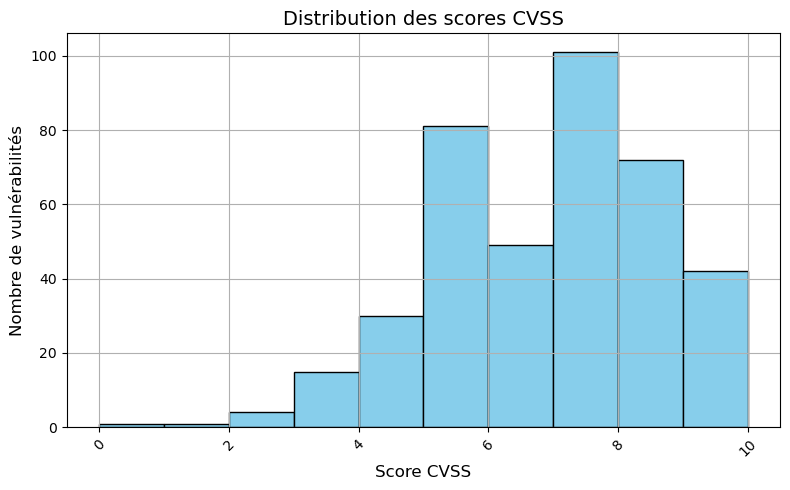

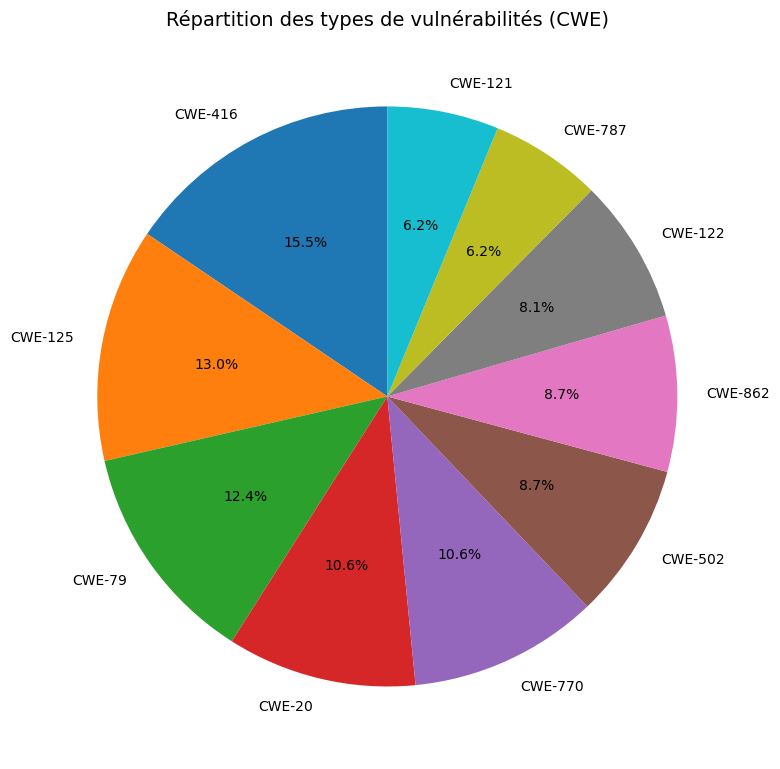

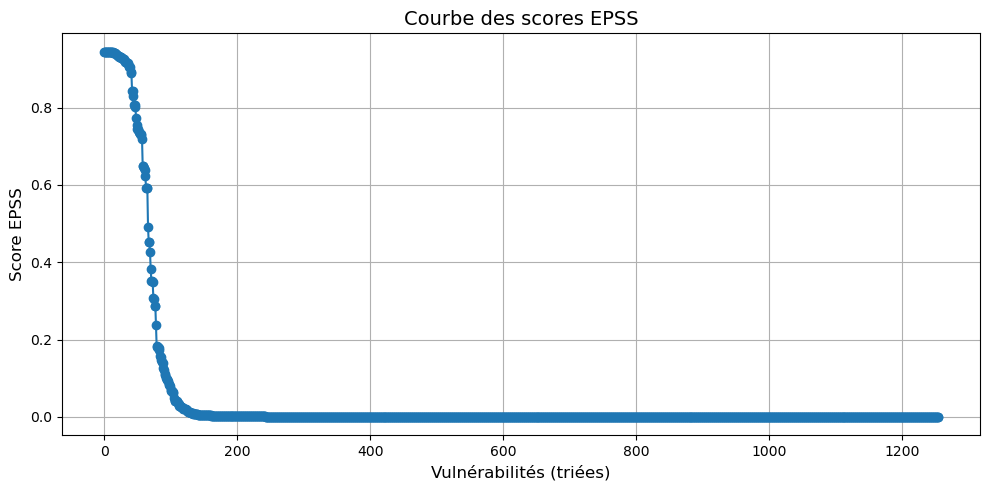

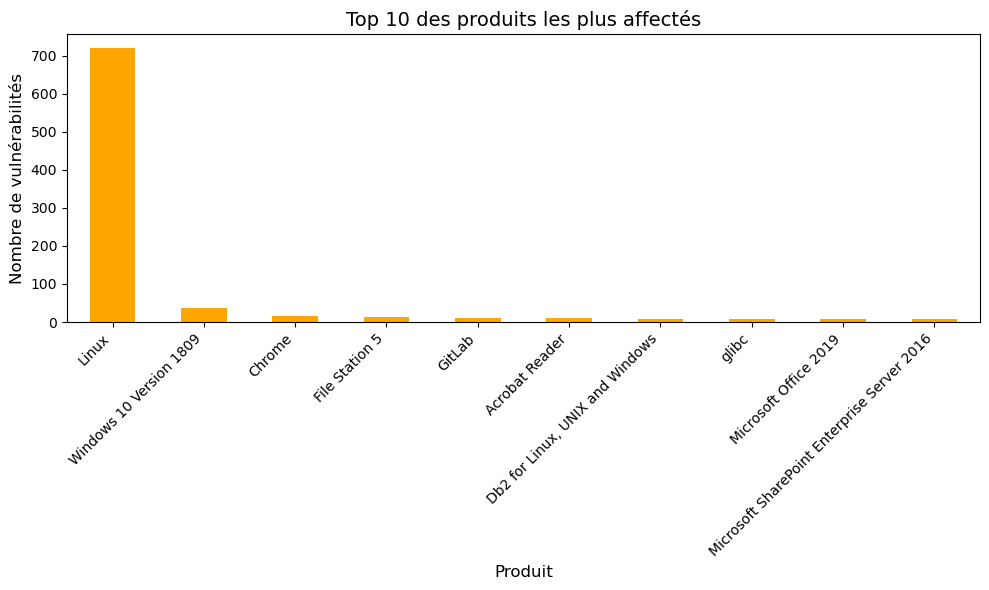

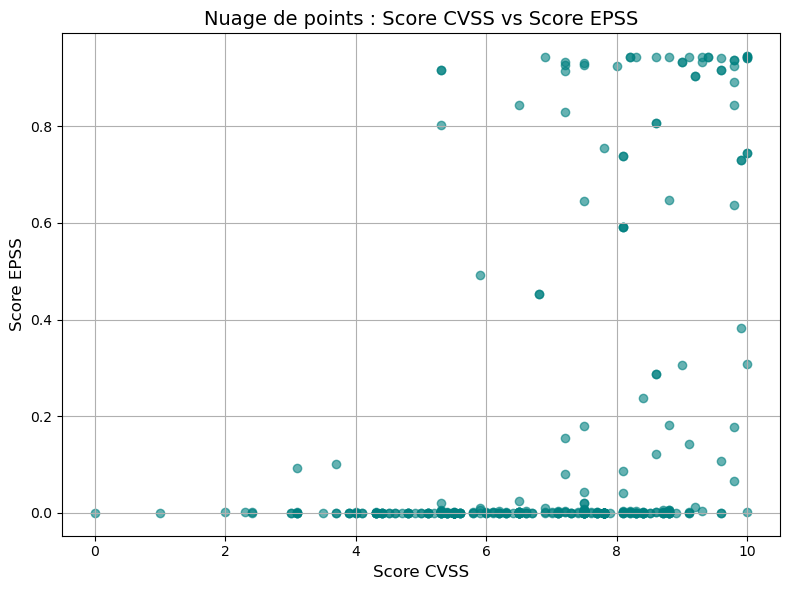

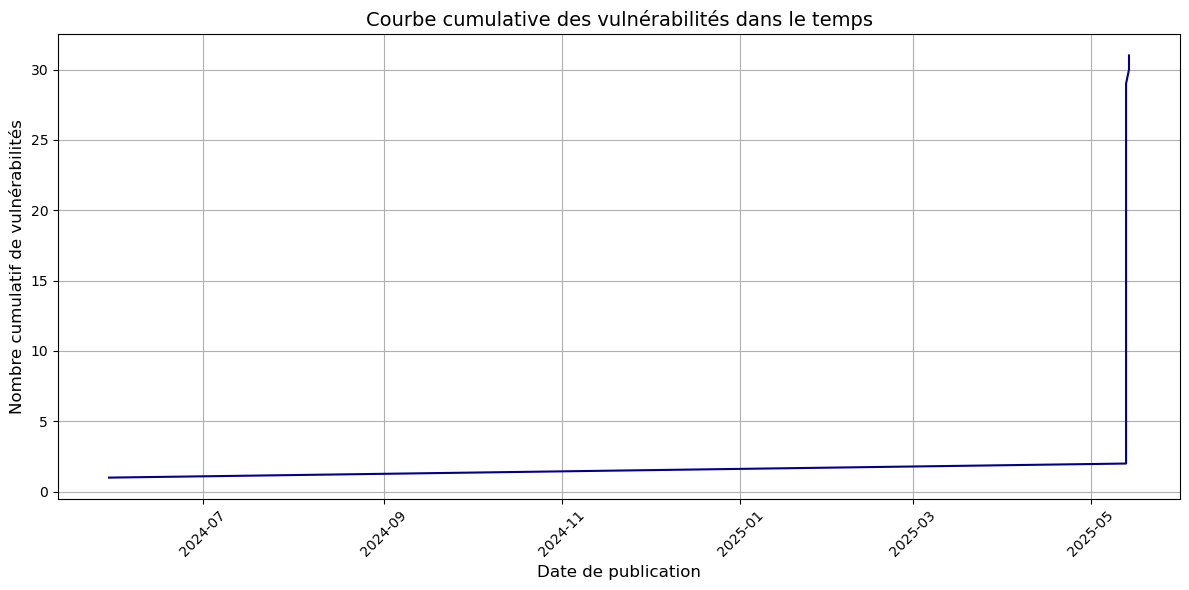

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("data.csv", sep=';')

# 1. Histogramme des scores CVSS
plt.figure(figsize=(8,5))
df['Score CVSS'].dropna().hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores CVSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Diagramme circulaire des types de vulnérabilités (CWE)
cwe_counts = df['Type CWE'].value_counts().head(10)
plt.figure(figsize=(8,8))
cwe_counts.index = cwe_counts.index.astype(str)
cwe_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Courbe des scores EPSS
df_sorted = df.sort_values("Score EPSS", ascending=False)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Score EPSS'].dropna().values, marker='o')
plt.title("Courbe des scores EPSS", fontsize=14)
plt.xlabel("Vulnérabilités (triées)", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Classement des produits les plus affectés
produit_counts = df['Produit'].value_counts().head(10)
plt.figure(figsize=(10,6))
produit_counts.plot(kind='bar', color='orange')
plt.title("Top 10 des produits les plus affectés", fontsize=14)
plt.xlabel("Produit", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Nuage de points Score CVSS vs Score EPSS
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')
df_clean = df.dropna(subset=['Score CVSS', 'Score EPSS'])

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Score CVSS'], df_clean['Score EPSS'], alpha=0.6, color='teal')
plt.title("Nuage de points : Score CVSS vs Score EPSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 6. Courbe cumulative des vulnérabilités dans le temps
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_clean = df.dropna(subset=['Date de publication']).copy()
df_clean['Date de publication'] = df_clean['Date de publication'].dt.tz_localize(None)
df_sorted = df_clean.sort_values('Date de publication').copy()
df_sorted['Cumul'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(12,6))
plt.plot(df_sorted['Date de publication'], df_sorted['Cumul'], color='darkblue')
plt.title("Courbe cumulative des vulnérabilités dans le temps", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre cumulatif de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## Remplissage des données

In [6]:
import pandas as pd
import numpy as np

# Chargement
df = pd.read_csv("data.csv", sep=";")

# Colonnes
score_cvss_col = "Score CVSS"
score_epss_col = "Score EPSS"
severity_col = "Base Severity"
product_col = "Produit"

# Nettoyage : conversion et remplacement des valeurs manquantes
df[score_cvss_col] = pd.to_numeric(df[score_cvss_col], errors='coerce')
df[score_epss_col] = pd.to_numeric(df[score_epss_col], errors='coerce')
df[severity_col] = df[severity_col].replace(['', 'nan', 'NaN'], np.nan)

# Normalisation du score EPSS
epss_min = df[score_epss_col].min()
epss_max = df[score_epss_col].max()
df["EPSS normalisé"] = (df[score_epss_col] - epss_min) / (epss_max - epss_min)

# Arrondi pour groupement
df["EPSS arrondi"] = df["EPSS normalisé"].round(4)

# Fonction mode avec fallback
def mode_or_nan(series):
    m = series.mode()
    return m.iloc[0] if not m.empty else np.nan

# Moyennes et modes par groupe (Produit + EPSS arrondi)
grouped = df.groupby([product_col, "EPSS arrondi"])
mean_cvss = grouped[score_cvss_col].mean()
mode_severity = grouped[severity_col].agg(mode_or_nan)

# Moyennes/modes globales
global_mean_cvss = df[score_cvss_col].mean()
global_mode_severity = mode_or_nan(df[severity_col])

# Fonction d’imputation
def impute_row(row):
    product = row[product_col]
    epss_rounded = round(row["EPSS normalisé"], 4) if not pd.isna(row["EPSS normalisé"]) else np.nan

    # Score CVSS
    if pd.isna(row[score_cvss_col]):
        if (product, epss_rounded) in mean_cvss.index and not pd.isna(mean_cvss.loc[(product, epss_rounded)]):
            row[score_cvss_col] = round(mean_cvss.loc[(product, epss_rounded)], 2)
        else:
            row[score_cvss_col] = round(global_mean_cvss, 2)

    # Base Severity
    if pd.isna(row[severity_col]):
        if (product, epss_rounded) in mode_severity.index and not pd.isna(mode_severity.loc[(product, epss_rounded)]):
            row[severity_col] = mode_severity.loc[(product, epss_rounded)]
        else:
            row[severity_col] = global_mode_severity

    return row

# Application de l’imputation
df_imputed = df.apply(impute_row, axis=1)

# Affichage des valeurs manquantes restantes
print("Valeurs manquantes après imputation :")
print(df_imputed[[score_cvss_col, severity_col]].isna().sum())

# Sauvegarde
df_imputed.drop(columns=["EPSS normalisé", "EPSS arrondi"]).to_csv("data_complet.csv", sep=";", index=False)
print("Imputation terminée, sauvegardée dans data_complet.csv")


Valeurs manquantes après imputation :
Score CVSS       0
Base Severity    0
dtype: int64
Imputation terminée, sauvegardée dans data_complet.csv


## visualisation données complètes

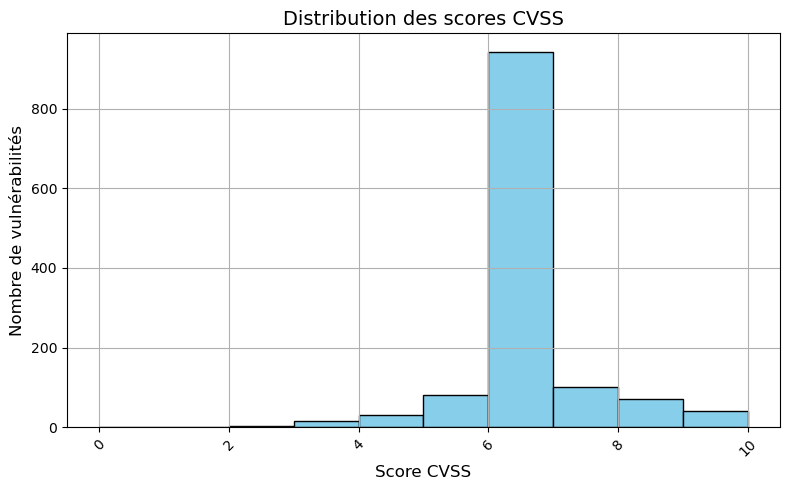

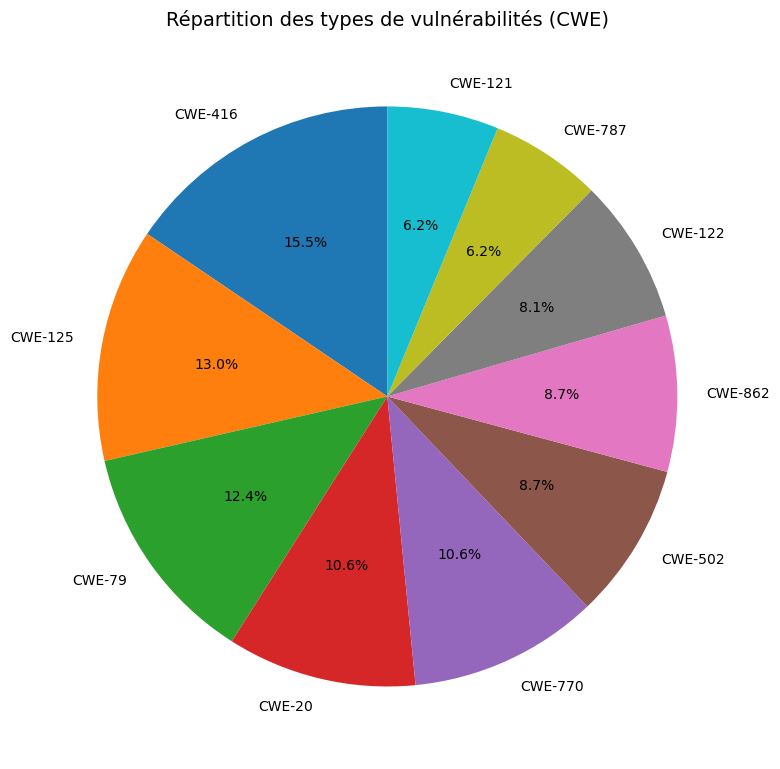

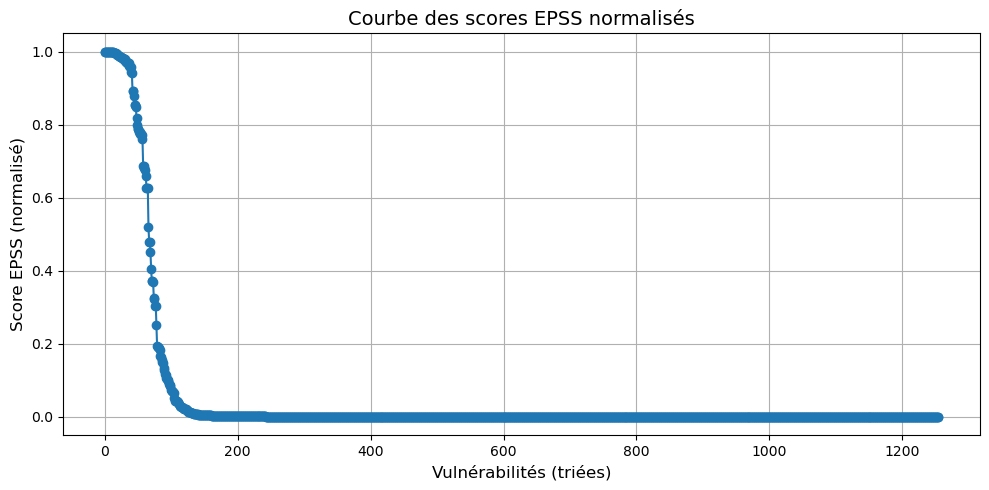

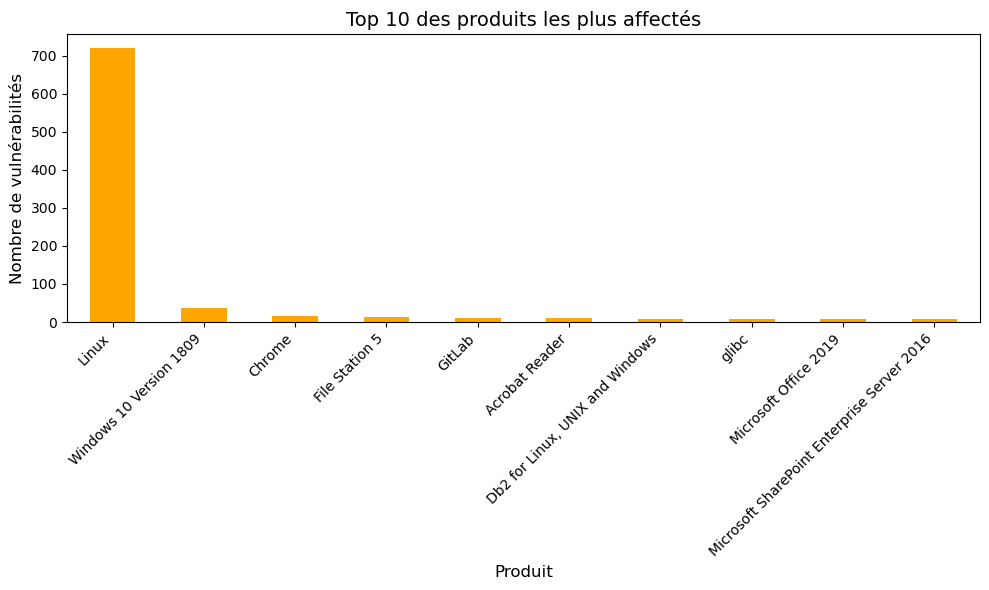

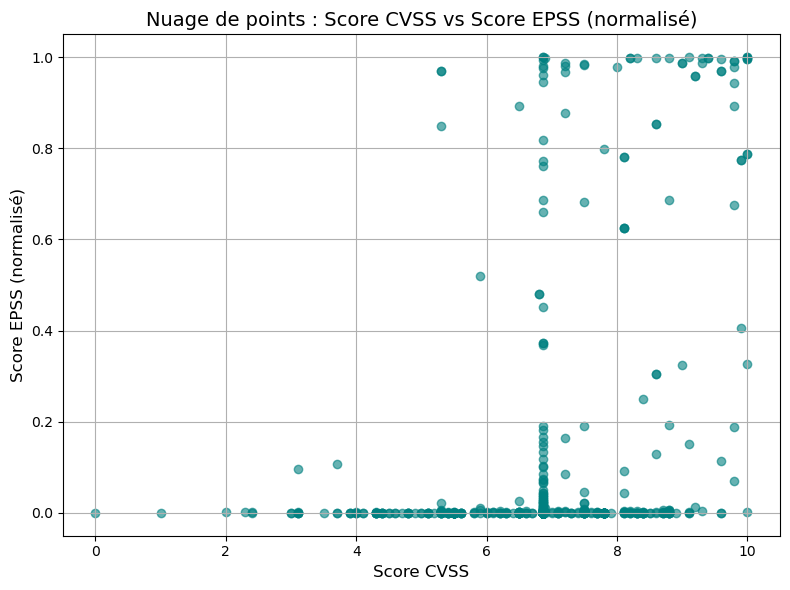

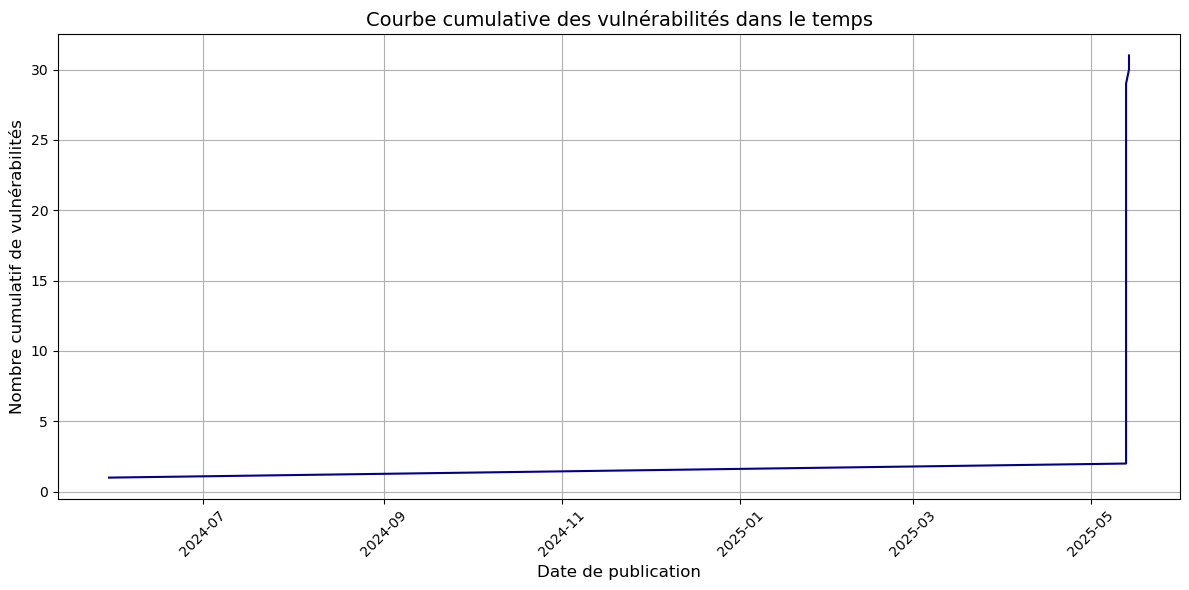

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("data_complet.csv", sep=';')

# Conversion des champs numériques
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')

# Création du score EPSS normalisé si pas déjà dans le fichier
if 'EPSS normalisé' not in df.columns:
    epss_min = df['Score EPSS'].min()
    epss_max = df['Score EPSS'].max()
    df['EPSS normalisé'] = (df['Score EPSS'] - epss_min) / (epss_max - epss_min)

# 1. Histogramme des scores CVSS
plt.figure(figsize=(8,5))
df['Score CVSS'].dropna().hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores CVSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Diagramme circulaire des types de vulnérabilités (CWE)
cwe_counts = df['Type CWE'].value_counts().head(10)
plt.figure(figsize=(8,8))
cwe_counts.index = cwe_counts.index.astype(str)
cwe_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Courbe des scores EPSS normalisés
df_sorted = df.sort_values("EPSS normalisé", ascending=False)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['EPSS normalisé'].dropna().values, marker='o')
plt.title("Courbe des scores EPSS normalisés", fontsize=14)
plt.xlabel("Vulnérabilités (triées)", fontsize=12)
plt.ylabel("Score EPSS (normalisé)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Classement des produits les plus affectés
produit_counts = df['Produit'].value_counts().head(10)
plt.figure(figsize=(10,6))
produit_counts.plot(kind='bar', color='orange')
plt.title("Top 10 des produits les plus affectés", fontsize=14)
plt.xlabel("Produit", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Nuage de points : Score CVSS vs EPSS normalisé
df_clean = df.dropna(subset=['Score CVSS', 'EPSS normalisé'])
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Score CVSS'], df_clean['EPSS normalisé'], alpha=0.6, color='teal')
plt.title("Nuage de points : Score CVSS vs Score EPSS (normalisé)", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS (normalisé)", fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 6. Courbe cumulative des vulnérabilités dans le temps
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_clean_date = df.dropna(subset=['Date de publication']).copy()
df_clean_date['Date de publication'] = df_clean_date['Date de publication'].dt.tz_localize(None)
df_sorted_date = df_clean_date.sort_values('Date de publication').copy()
df_sorted_date['Cumul'] = range(1, len(df_sorted_date) + 1)

plt.figure(figsize=(12,6))
plt.plot(df_sorted_date['Date de publication'], df_sorted_date['Cumul'], color='darkblue')
plt.title("Courbe cumulative des vulnérabilités dans le temps", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre cumulatif de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## Étape 6 : Model Machine Learning

### ML supervisé — Prédiction du Score CVSS (régression)

Mean Squared Error (MSE) : 0.2912
R² score : 0.9085


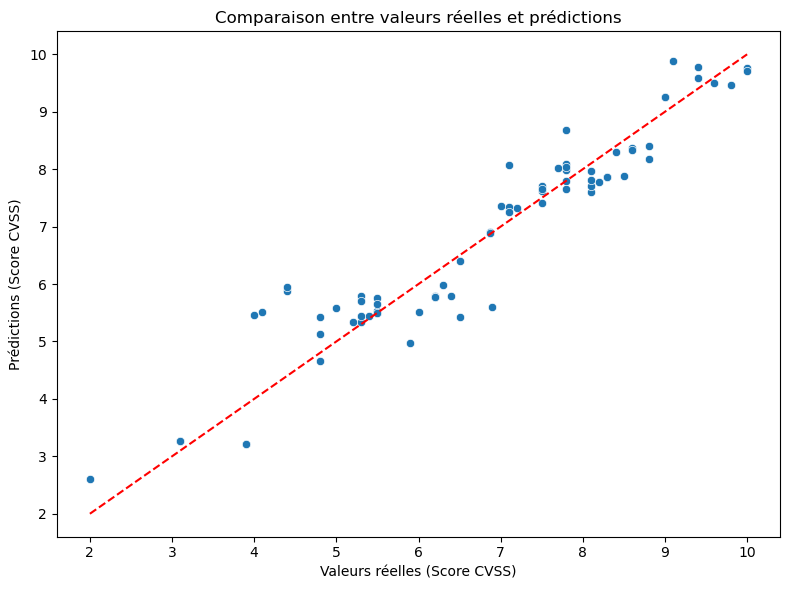

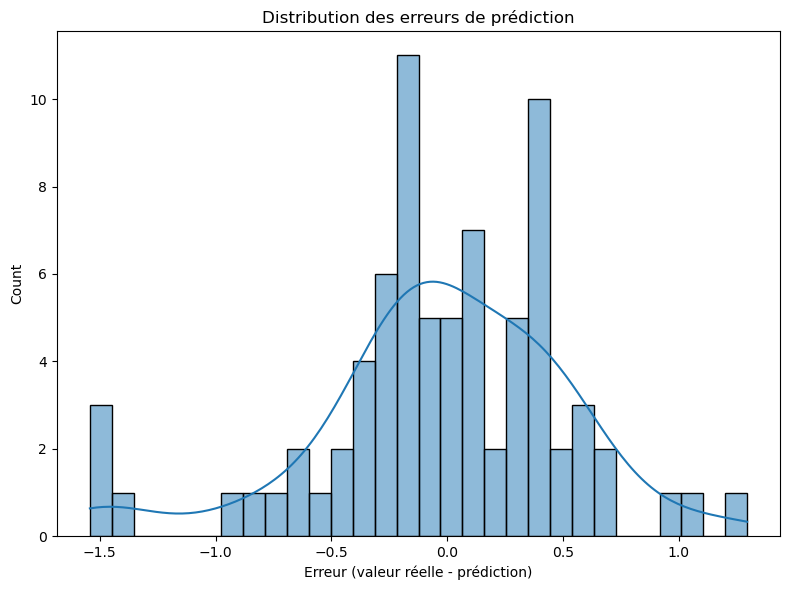

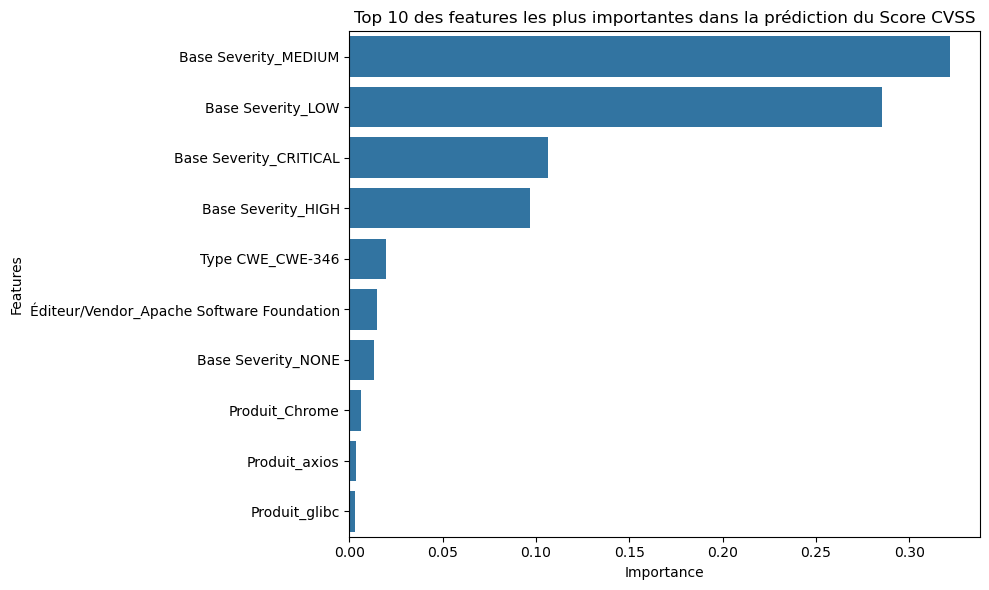

Nombre d'échantillons utilisés : 325


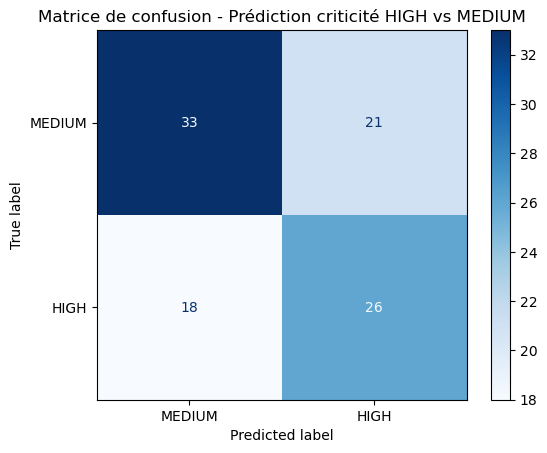

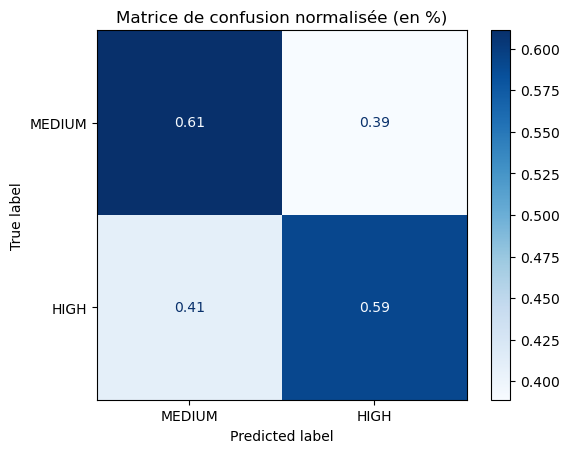

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chargement du fichier CSV
df = pd.read_csv("data_complet.csv", sep=";")

# Conversion des champs numériques
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')

# Création de la colonne EPSS normalisé si nécessaire
if 'EPSS normalisé' not in df.columns:
    epss_min = df['Score EPSS'].min()
    epss_max = df['Score EPSS'].max()
    df['EPSS normalisé'] = (df['Score EPSS'] - epss_min) / (epss_max - epss_min)

# --- Préparation du modèle ---

# Nouvelle target
target = 'Score CVSS'

# Colonnes explicatives (on enlève 'Score CVSS' car c’est la target maintenant)
features = ['Type CWE', 'Base Severity', 'Éditeur/Vendor', 'Produit']

# Supprimer les lignes sans target ni features
df = df.dropna(subset=features + [target])

# Séparer X et y
X = df[features]
y = df[target]

# Colonnes catégorielles (ici, toutes les features sont catégorielles)
categorical_cols = features
numerical_cols = []  # plus de colonnes numériques dans les features

# Prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Modèle
model = RandomForestRegressor(random_state=42)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"R² score : {r2:.4f}")

# --- Visualisation ---

# 1. Valeurs réelles vs prédictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeurs réelles (Score CVSS)")
plt.ylabel("Prédictions (Score CVSS)")
plt.title("Comparaison entre valeurs réelles et prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# 2. Distribution des erreurs
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Erreur (valeur réelle - prédiction)")
plt.title("Distribution des erreurs de prédiction")
plt.tight_layout()
plt.show()

# 3. Importance des features
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_cols)
importances = pipeline.named_steps['regressor'].feature_importances_

# Top N
top_n = 10
indices = importances.argsort()[::-1][:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title(f"Top {top_n} des features les plus importantes dans la prédiction du Score CVSS")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Préparation des données
df_crit = df[df['Base Severity'].isin(['HIGH', 'MEDIUM'])].dropna(subset=['Base Severity', 'Score EPSS'])
X = df_crit[['Score EPSS']]  # Ajouter plus de features si possible
y = LabelEncoder().fit_transform(df_crit['Base Severity'])
print("Nombre d'échantillons utilisés :", df_crit.shape[0])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MEDIUM', 'HIGH'])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Prédiction criticité HIGH vs MEDIUM")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalisation par ligne (par classe réelle)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['MEDIUM', 'HIGH'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Matrice de confusion normalisée (en %)")
plt.show()




### ML non supervisé — Clustering des vulnérabilités

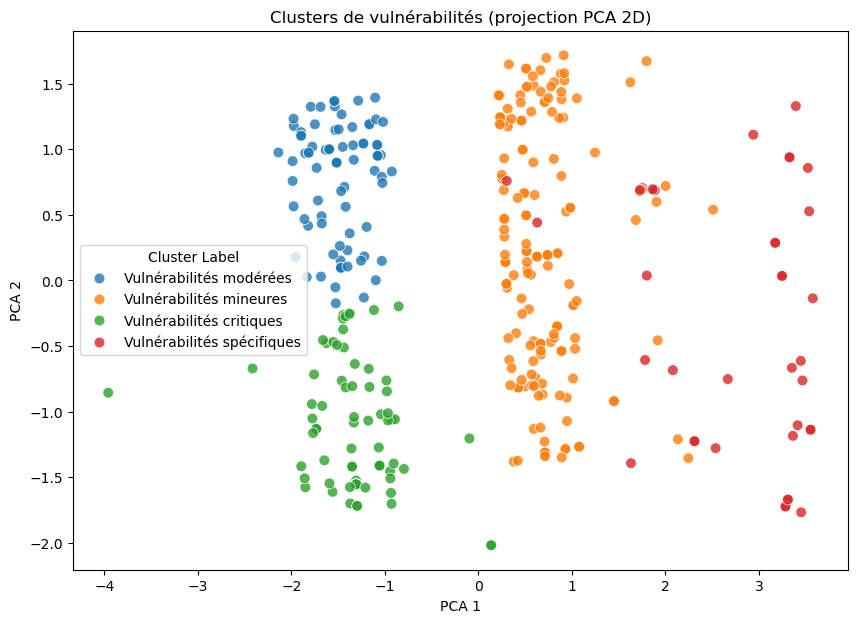

Taille des clusters :
cluster_label
Vulnérabilités mineures       181
Vulnérabilités modérées        83
Vulnérabilités critiques       80
Vulnérabilités spécifiques     37
Name: count, dtype: int64

Statistiques par cluster (moyennes) :
                            Score CVSS  Score EPSS  Base Severity Enc  \
cluster_label                                                           
Vulnérabilités critiques      5.252500    0.035273           2.925000   
Vulnérabilités mineures       7.823094    0.016031           0.939227   
Vulnérabilités modérées       5.110843    0.002197           2.843373   
Vulnérabilités spécifiques    8.840000    0.868991           0.459459   

                            Type CWE Enc  
cluster_label                             
Vulnérabilités critiques       22.287500  
Vulnérabilités mineures        59.674033  
Vulnérabilités modérées        90.867470  
Vulnérabilités spécifiques     54.270270  


/var/folders/r7/2mh594td6tq3pqzv49xfkh7r0000gn/T/ipykernel_2082/3840203334.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=df_unsup, palette='tab10')


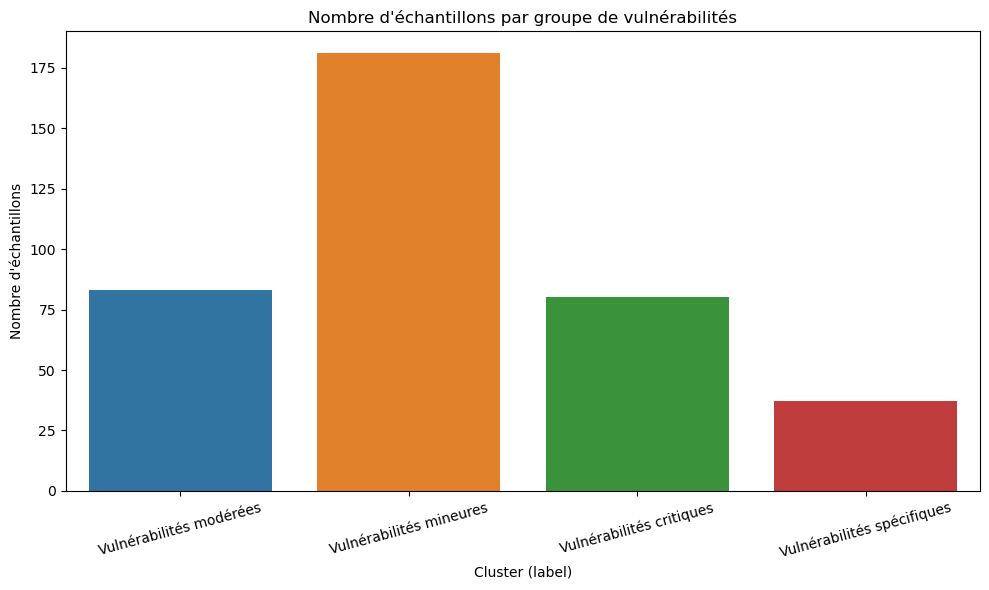

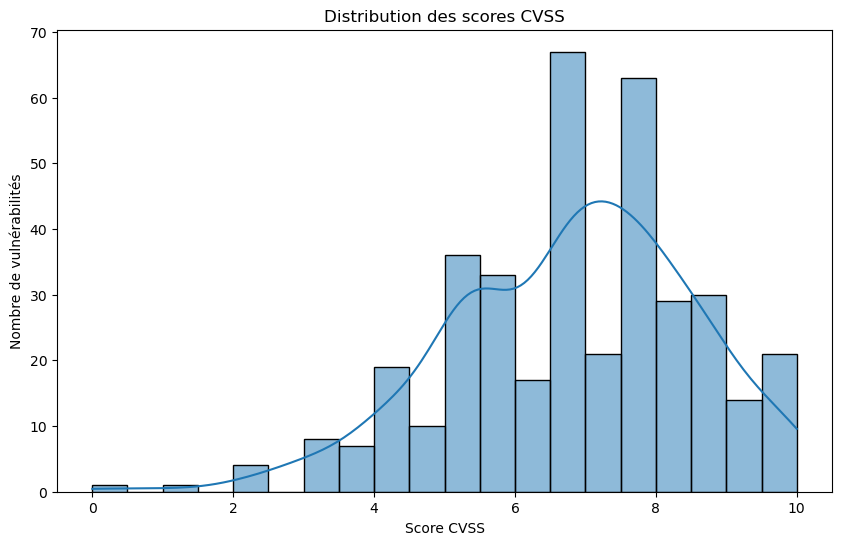

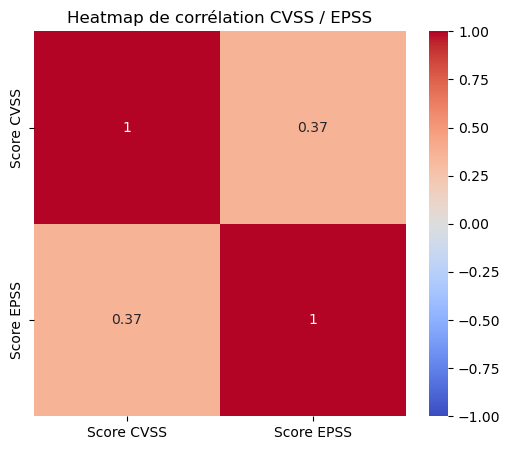

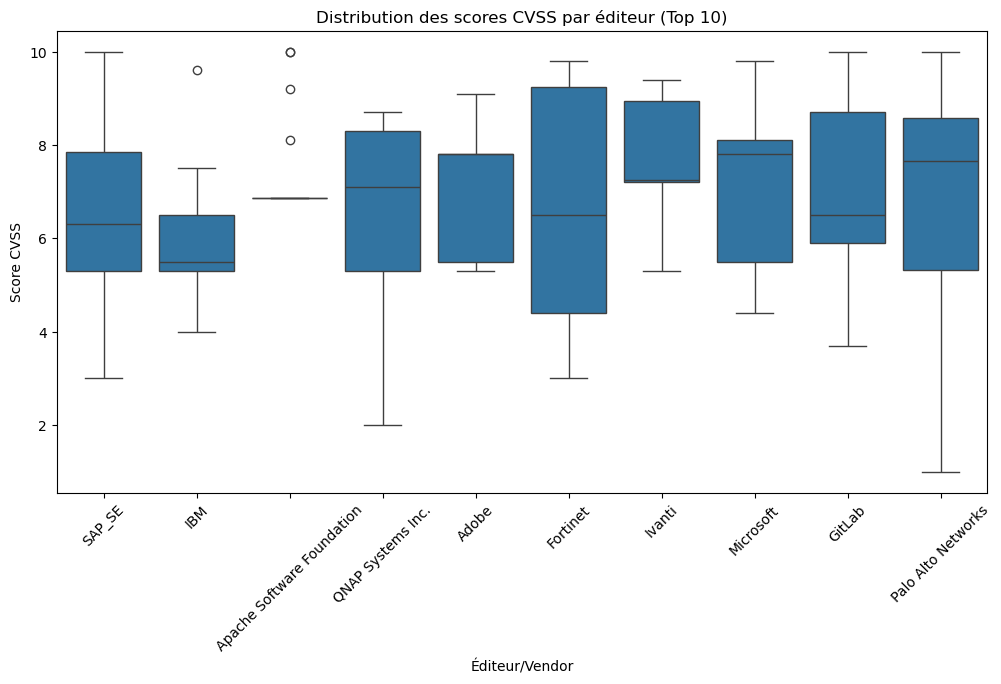

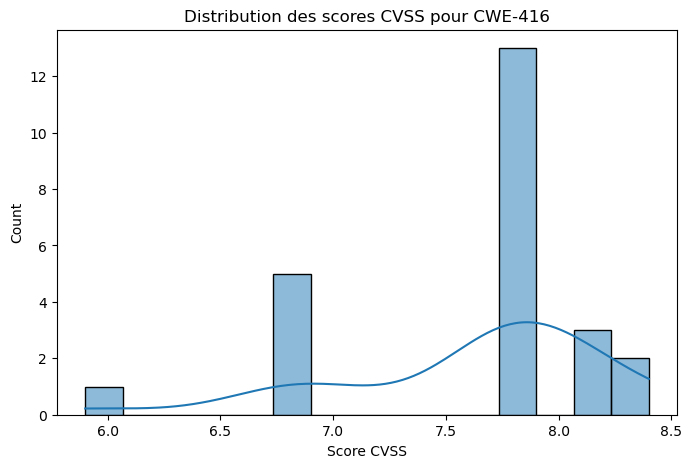

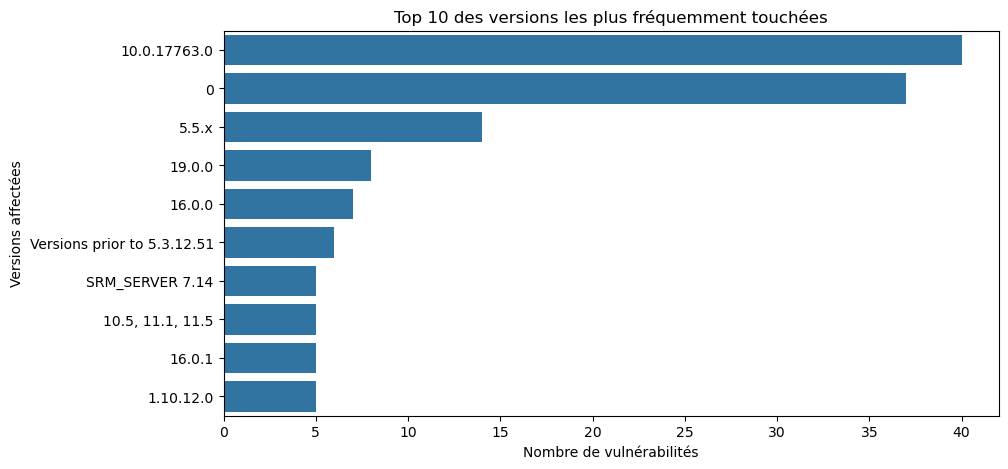

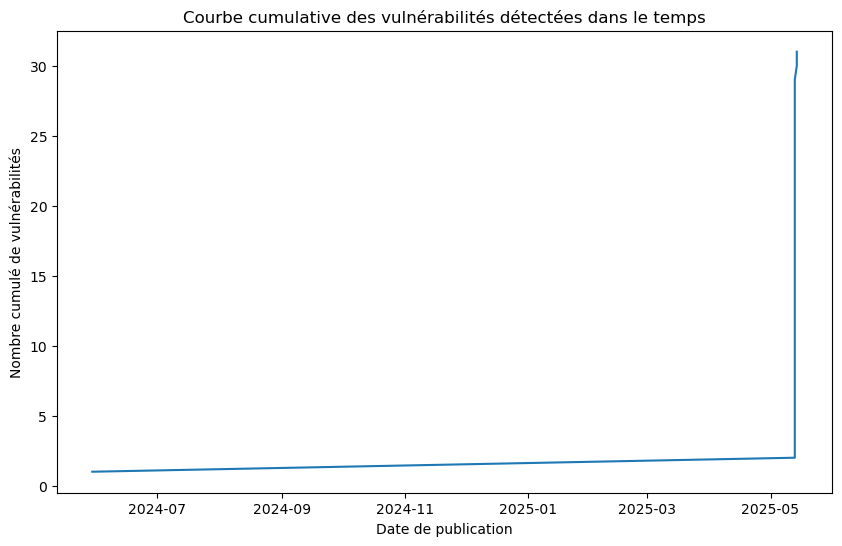

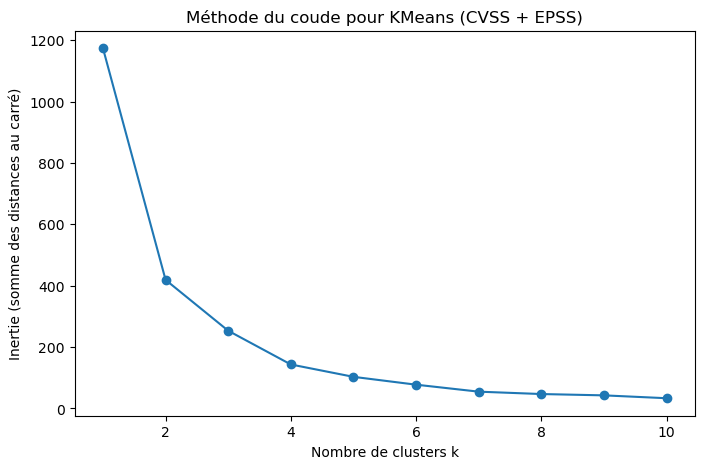

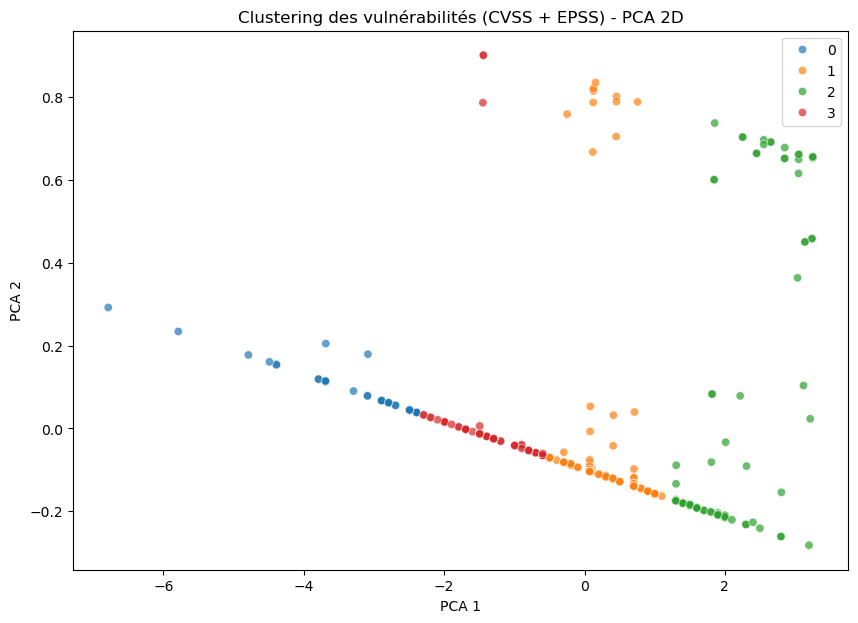

Variance expliquée par chaque composante :
Composante 1: 0.980
Composante 2: 0.020


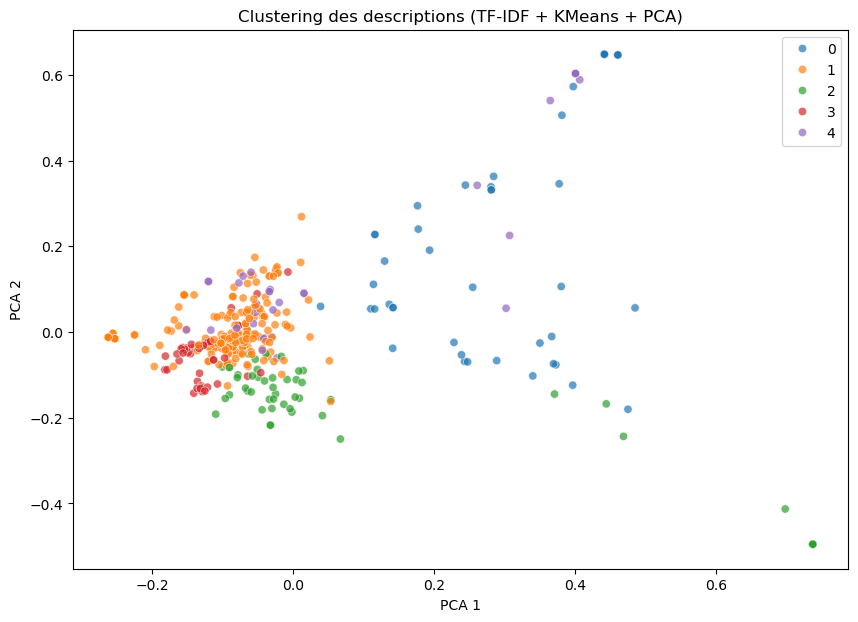

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_unsup = ['Score CVSS', 'Score EPSS', 'Base Severity', 'Type CWE']

df_unsup = df.dropna(subset=features_unsup).copy()

# Encodage catégoriel avec .loc pour éviter warning
df_unsup.loc[:, 'Base Severity Enc'] = LabelEncoder().fit_transform(df_unsup['Base Severity'])
df_unsup.loc[:, 'Type CWE Enc'] = LabelEncoder().fit_transform(df_unsup['Type CWE'])

X_unsup = df_unsup[['Score CVSS', 'Score EPSS', 'Base Severity Enc', 'Type CWE Enc']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_unsup['cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster_labels = {
    0: "Vulnérabilités modérées",
    1: "Vulnérabilités mineures",
    2: "Vulnérabilités critiques",
    3: "Vulnérabilités spécifiques"
}

label_names = df_unsup['cluster'].map(cluster_labels)

plt.figure(figsize=(10, 7))
palette = sns.color_palette('tab10', len(cluster_labels))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label_names, palette=palette, s=60, alpha=0.8)
plt.title('Clusters de vulnérabilités (projection PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster Label')
plt.show()

df_unsup['cluster_label'] = label_names

print("Taille des clusters :")
print(df_unsup['cluster_label'].value_counts())

print("\nStatistiques par cluster (moyennes) :")
print(df_unsup.groupby('cluster_label')[['Score CVSS', 'Score EPSS', 'Base Severity Enc', 'Type CWE Enc']].mean())

plt.figure(figsize=(10,6))
sns.countplot(x='cluster_label', data=df_unsup, palette='tab10')
plt.title("Nombre d'échantillons par groupe de vulnérabilités")
plt.xlabel("Cluster (label)")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Score CVSS'].dropna(), bins=20, kde=True)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df[['Score CVSS', 'Score EPSS']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap de corrélation CVSS / EPSS")
plt.show()

plt.figure(figsize=(12,6))
top_vendors = df['Éditeur/Vendor'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Éditeur/Vendor'].isin(top_vendors)], x='Éditeur/Vendor', y='Score CVSS')
plt.title("Distribution des scores CVSS par éditeur (Top 10)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df[df['Type CWE'] == 'CWE-416']['Score CVSS'].dropna(), bins=15, kde=True)
plt.title("Distribution des scores CVSS pour CWE-416")
plt.xlabel("Score CVSS")
plt.show()

top_versions = df['Versions affectées'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_versions.values, y=top_versions.index)
plt.title("Top 10 des versions les plus fréquemment touchées")
plt.xlabel("Nombre de vulnérabilités")
plt.ylabel("Versions affectées")
plt.show()

df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_sorted = df.dropna(subset=['Date de publication']).sort_values('Date de publication')
df_sorted['cumulative_count'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(10,6))
plt.plot(df_sorted['Date de publication'], df_sorted['cumulative_count'])
plt.title("Courbe cumulative des vulnérabilités détectées dans le temps")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.show()


X_numeric = df[['Score CVSS', 'Score EPSS']].dropna()

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numeric)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude pour KMeans (CVSS + EPSS)")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (somme des distances au carré)")
plt.show()

k = 4  # choisi en fonction de la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_numeric)

df['cluster'] = pd.NA
df.loc[X_numeric.index, 'cluster'] = clusters

# Visualisation avec PCA 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10', alpha=0.7)
plt.title("Clustering des vulnérabilités (CVSS + EPSS) - PCA 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

pca_full = PCA(n_components=2)
pca_full.fit(X_numeric)

print("Variance expliquée par chaque composante :")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"Composante {i+1}: {var:.3f}")


from sklearn.feature_extraction.text import TfidfVectorizer

# Nettoyage simple
df_text = df.dropna(subset=['Description'])
texts = df_text['Description'].values

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# KMeans
k = 5
kmeans_desc = KMeans(n_clusters=k, random_state=42)
clusters_desc = kmeans_desc.fit_predict(X_tfidf)

# PCA pour visualisation
pca_desc = PCA(n_components=2)
X_desc_pca = pca_desc.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_desc_pca[:,0], y=X_desc_pca[:,1], hue=clusters_desc, palette='tab10', alpha=0.7)
plt.title("Clustering des descriptions (TF-IDF + KMeans + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



## Étape 7 : Génération d'Alertes et Notifications Email

In [5]:
import smtplib
from email.mime.text import MIMEText
from dotenv import load_dotenv
import os
import pandas as pd

# Charger les variables d'environnement
load_dotenv()
from_email = os.getenv("EMAIL_ADDRESS")
password = os.getenv("EMAIL_PASSWORD")

# Fonction d'envoi d'email
def send_email(to_email, subject, body):
    msg = MIMEText(body)
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject

    try:
        server = smtplib.SMTP('smtp.office365.com', 587)
        server.starttls()
        server.login(from_email, password)
        server.sendmail(from_email, to_email, msg.as_string())
        server.quit()
        print(f"✅ Email envoyé à {to_email}.")
    except Exception as e:
        print(f"❌ Erreur lors de l'envoi de l'email : {e}")

# 1. Charger les données
df = pd.read_csv("data_complet.csv", sep=";")

# 2. Définir les critères
# Exemples : criticité = 'Critical', système = 'Linux'
CRITICITE_VISEE = "Critical"
SYSTEME_VISE = "GitLab"  # Recherché dans Éditeur/Vendor ou Produit

# 3. Filtrage des vulnérabilités critiques liées à Linux
df_filtered = df[
    (df['Base Severity'].str.strip().str.lower() == CRITICITE_VISEE.lower()) &
    (
        df['Produit'].str.contains(SYSTEME_VISE, case=False, na=False) |
        df['Éditeur/Vendor'].str.contains(SYSTEME_VISE, case=False, na=False)
    )
]

# 4. Envoi d’un mail pour chaque menace filtrée
for _, row in df_filtered.iterrows():
    titre = row['Titre du bulletin (ANSSI)']
    produit = row['Produit']
    score_cvss = row['Score CVSS']
    score_epss = row['Score EPSS']
    lien = row['Lien du bulletin (ANSSI)']
    date = row['Date de publication']

    body = (
        f"🚨 Alerte de sécurité critique ({CRITICITE_VISEE}) détectée 🚨\n\n"
        f"📝 Titre : {titre}\n"
        f"📅 Date : {date}\n"
        f"💻 Produit concerné : {produit}\n"
        f"📊 Score CVSS : {score_cvss}\n"
        f"📈 Score EPSS : {score_epss}\n"
        f"🔗 Lien ANSSI : {lien}\n\n"
        f"Veuillez appliquer un correctif dès que possible."
    )

    send_email(
        "thibault.bial@efrei.net",  # à personnaliser
        f"[ALERTE] {produit} - {CRITICITE_VISEE} vulnérabilité",
        body
    )


✅ Email envoyé à thibault.bial@efrei.net.
✅ Email envoyé à thibault.bial@efrei.net.
